<a href="https://colab.research.google.com/github/ISHAAN-KKR/BitsGoa/blob/main/BitsGoa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:

Write a Python script to analyze historical stock data for a NIFTY50 stock from Yahoo Finance for the period from August 1, 2022, to August 1, 2024. The script should:

Install the necessary libraries (numpy, pandas, yfinance, matplotlib).
Download the data for the given period.
Extract the Open, High, Low, Close, Adj Close, and Volume columns.
Calculate and plot the 14-day and 50-day relative strength index (RSI) on the same graph, with different colors for each RSI.
Compute and visualize the daily percentage change in the Closing Prices and plot it as a histogram with appropriate bins.
Create a subplot with three charts:
The first chart should display the daily Closing Prices with 14-day and 50-day RSI.
The second chart should show the daily Volume.
The third chart should display the histogram of daily percentage changes.

Deadline- 11th August 11.59pm

In [1]:
# Install necessary libraries
!pip install numpy pandas yfinance matplotlib --quiet
# Import libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

Using the NIFTY50 index and its ticker is ^NSEI

In [11]:
# Define the stock ticker and date range
ticker = '^NSEI'
start_date = '2022-08-01'
end_date = '2024-08-01'

# Download historical stock data
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [12]:
# Extract the relevant columns
data = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

Created a separate function for RSI Calculation

In [13]:
# Calculate the 14-day and 50-day relative strength index (RSI)
def calculate_rsi(data, window):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI_14'] = calculate_rsi(data, 14)
data['RSI_50'] = calculate_rsi(data, 50)

Ploted the exponential moving average for NIFTY50

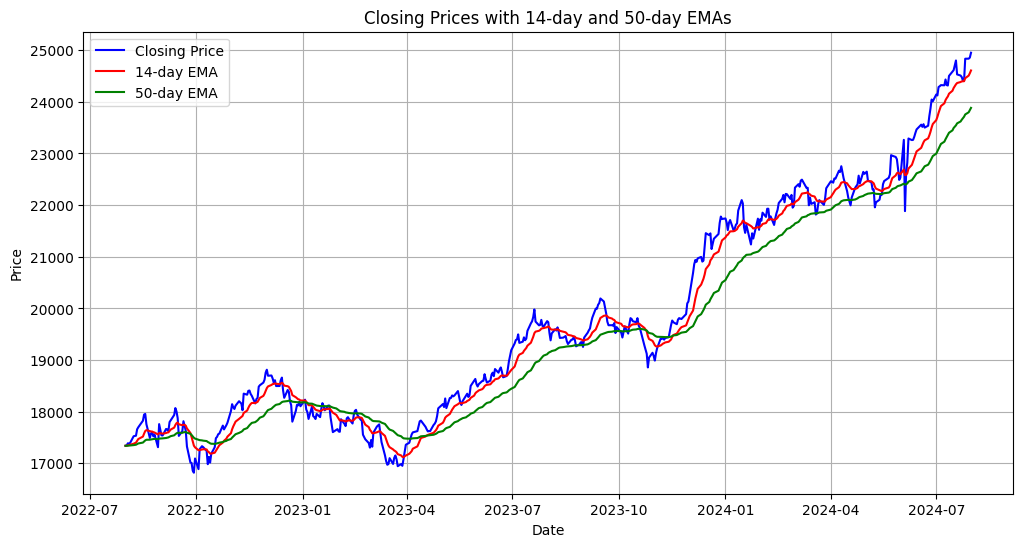

In [14]:
# Calculate the 14-day and 50-day exponential moving averages (EMAs)
data['EMA_14'] = data['Close'].ewm(span=14, adjust=False).mean()
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
# Plot the Closing Prices with EMAs
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
plt.plot(data.index, data['EMA_14'], label='14-day EMA', color='red')
plt.plot(data.index, data['EMA_50'], label='50-day EMA', color='green')
plt.title('Closing Prices with 14-day and 50-day EMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

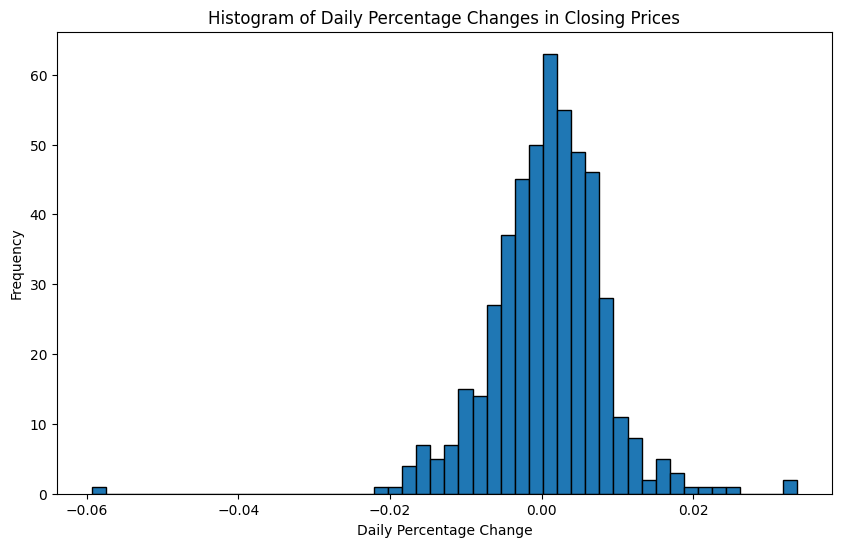

In [15]:
# Calculate the daily percentage change in Closing Prices
# Plot histogram of daily percentage changes
data['Daily_Change'] = data['Close'].pct_change()

plt.figure(figsize=(10, 6))
plt.hist(data['Daily_Change'].dropna(), bins=50, edgecolor='black')
plt.title('Histogram of Daily Percentage Changes in Closing Prices')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.show()


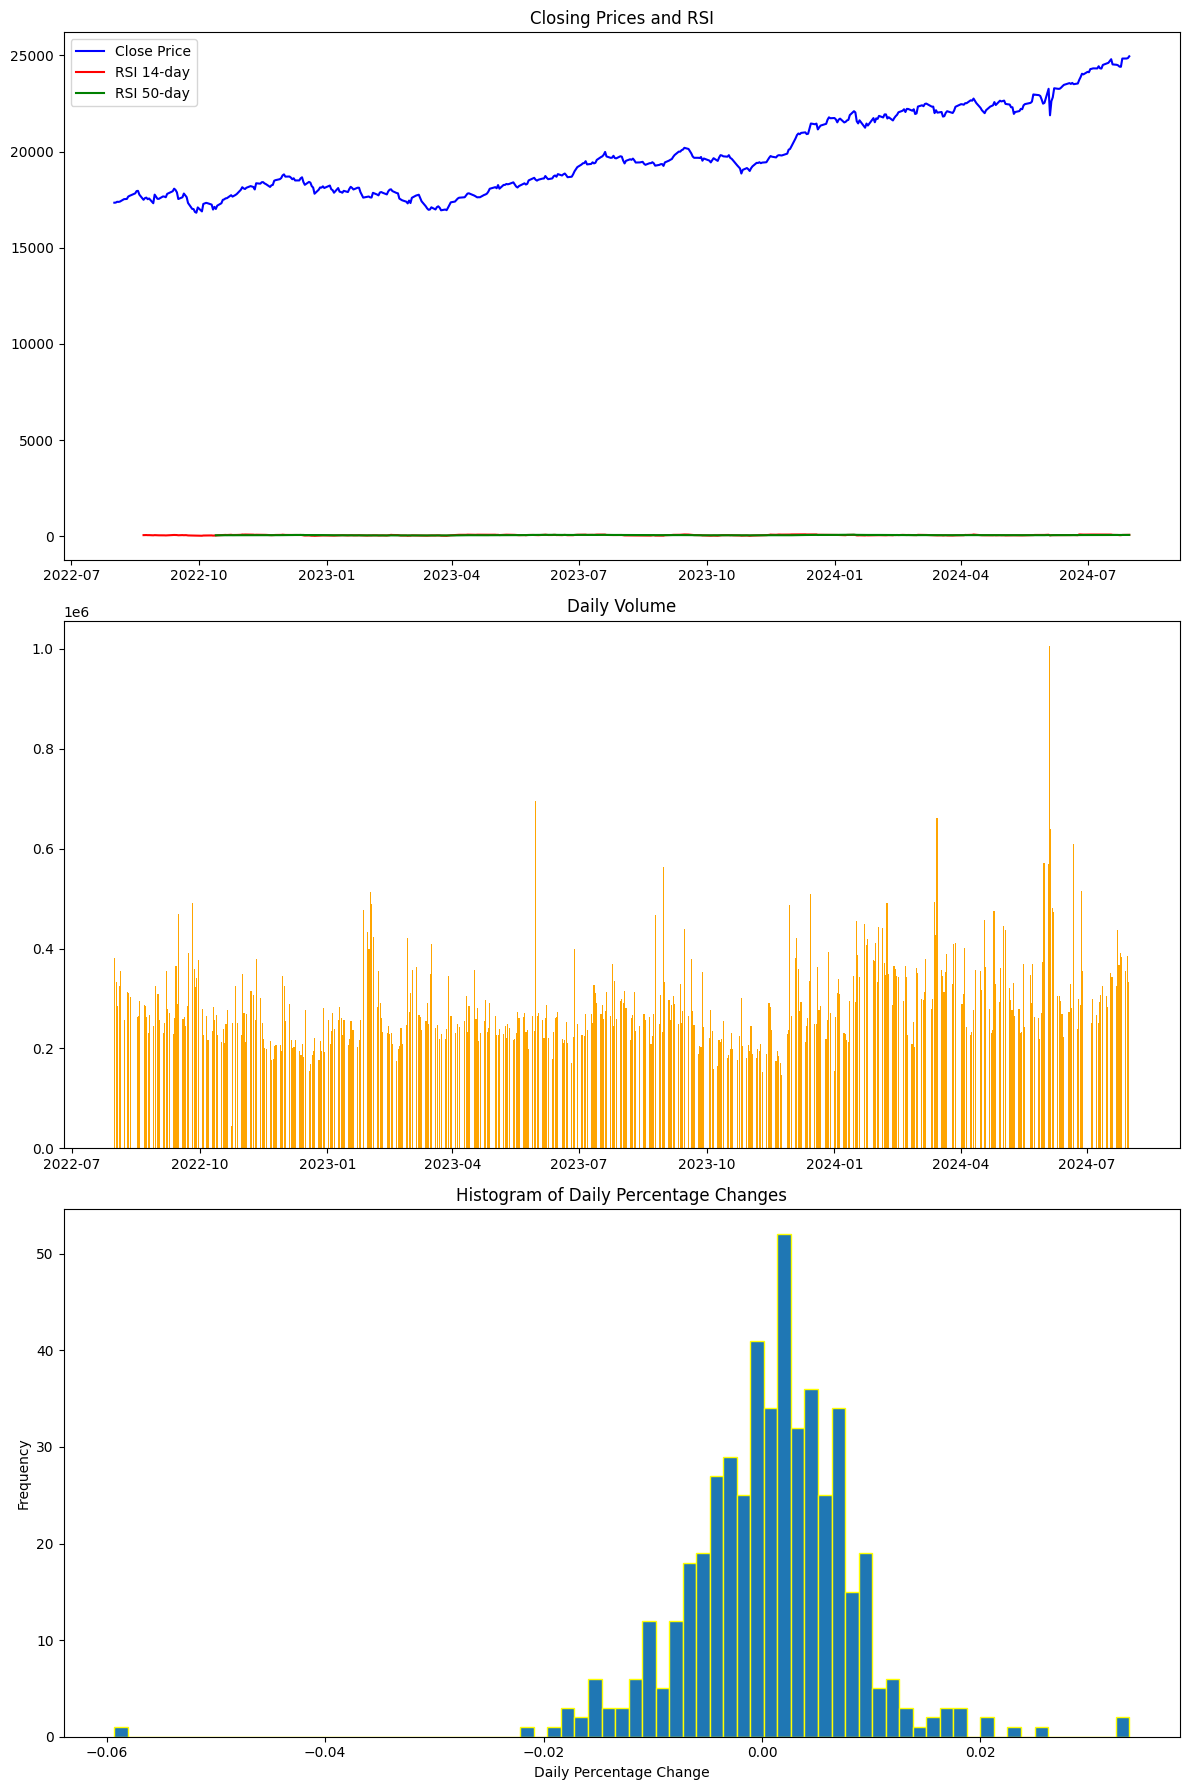

In [21]:
# Create subplots
# Plot Closing Prices and RSI
# Plot Volume
# Plot histogram of daily percentage changes
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot Closing Prices and RSI
axs[0].plot(data.index, data['Close'], label='Close Price', color='blue')
axs[0].plot(data.index, data['RSI_14'], label='RSI 14-day', color='red')
axs[0].plot(data.index, data['RSI_50'], label='RSI 50-day', color='green')
axs[0].set_title('Closing Prices and RSI')
axs[0].legend()

# Plot Volume
axs[1].bar(data.index, data['Volume'], color='orange')
axs[1].set_title('Daily Volume')

# Plot histogram of daily percentage changes
axs[2].hist(data['Daily_Change'].dropna(), bins=75, edgecolor='yellow')
axs[2].set_title('Histogram of Daily Percentage Changes')
axs[2].set_xlabel('Daily Percentage Change')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()